In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('C:/Users/TimK/Documents/ds_zoop_proj/zoopla_data_cleaned.csv')

In [4]:
df['title'] = df['title'].apply(lambda x: x.split('house')[0].strip('for sale'))

In [5]:
df.head()

,title,address,description,price,phone,closest_station,listed_on,image,closest_st_miles,prop_pc,d_from_c,listed_on_2
0,3 bed semi-detached,"Parker Avenue, Tilbury RM18",Three bedrooms ……. Off street parking for thre...,300000,01375 318969 **,Tilbury Town,"['Listed', 'on', '22nd', 'Aug', '2020']",https://lid.zoocdn.com/354/255/62ba4526ae4d3a6...,1.0,RM18,25.057837,22nd Aug 2020
1,3 bed semi-detached,"Stanway Road, Benfleet SS7",**available to view from Saturday 29th August-...,250000,01621 467848 **,Benfleet,"['Listed', 'on', '22nd', 'Aug', '2020']",https://lid.zoocdn.com/354/255/889c1345fbe3b9d...,1.5,SS7,33.432825,22nd Aug 2020
2,3 bed semi-detached,"Willowmead, Leybourne, West Malling ME19","Guide Price £300,000 - £325,000. Jack Charles ...",300000,01732 658092 **,West Malling,"['Listed', 'on', '21st', 'Aug', '2020']",https://lid.zoocdn.com/354/255/f78903931391257...,1.0,ME19,29.566699,21st Aug 2020
3,3 bed semi-detached,"Baker Road, Langley Park, Maidstone ME17",A contemporary 3 bedroom semi detached family ...,325000,01622 279528 **,Bearsted,"['Listed', 'on', '21st', 'Aug', '2020']",https://lid.zoocdn.com/354/255/137a316864699b5...,2.7,ME17,40.718816,21st Aug 2020
4,3 bed semi-detached,"Bisley, Woking, Surrey GU24",Set in a quiet cul de sac and offered to marke...,325000,01483 550642 **,Brookwood,"['Listed', 'on', '21st', 'Aug', '2020']",https://lid.zoocdn.com/354/255/b0dba3a15f021d0...,1.4,GU24,24.453962,21st Aug 2020


In [6]:
essex_a = ['grays','essex', 'cm', 'ss']
luton_a = ['lu','luton', 'dunstable','leighton buzzard']
kent_a = ['me8','me10', 'kent', 'me12']

def location_simplifier(address):
    if any(x in address.lower() for x in luton_a):
        return 'luton_area'
    elif any(x in address.lower() for x in essex_a):
        return 'essex_area'
    elif 'rg' in address.lower():
        return 'reading'
    elif any(x in address.lower() for x in kent_a):
        return 'kent_area'
    elif 'rochester' in address.lower():
        return 'rochester'
    elif 'sl' in address.lower():
        return 'slough'
    elif 'gu' in address.lower():
        return 'hampshire'
    elif 'mk' in address.lower():
        return 'milton keynes'
    else:
        return 'na'
    
def h_features(description):
    if 'large' in description.lower():
        return 'large'
    elif 'garden' in description.lower():
        return 'garden'
    elif 'london' in description.lower():
        return 'london'
    elif 'spacious' in description.lower():
        return 'spacious'
    elif 'exten' in description.lower():
        return 'extension'
    else:
        return 'na'
    


In [7]:
df['location_simp'] = df['address'].apply(location_simplifier)

In [8]:
# main areas in outside london that fit my criteria
df.location_simp.value_counts()

essex_area       284
luton_area       192
na               192
kent_area        188
reading           25
rochester         16
hampshire         11
slough             8
milton keynes      8
Name: location_simp, dtype: int64

In [9]:
# Potential of properties
df['description_simp'] = df['description'].apply(h_features)
df.description_simp.value_counts()

na           429
garden       166
spacious     133
large        107
extension     73
london        16
Name: description_simp, dtype: int64

In [10]:
df.head()

,title,address,description,price,phone,closest_station,listed_on,image,closest_st_miles,prop_pc,d_from_c,listed_on_2,location_simp,description_simp
0,3 bed semi-detached,"Parker Avenue, Tilbury RM18",Three bedrooms ……. Off street parking for thre...,300000,01375 318969 **,Tilbury Town,"['Listed', 'on', '22nd', 'Aug', '2020']",https://lid.zoocdn.com/354/255/62ba4526ae4d3a6...,1.0,RM18,25.057837,22nd Aug 2020,na,na
1,3 bed semi-detached,"Stanway Road, Benfleet SS7",**available to view from Saturday 29th August-...,250000,01621 467848 **,Benfleet,"['Listed', 'on', '22nd', 'Aug', '2020']",https://lid.zoocdn.com/354/255/889c1345fbe3b9d...,1.5,SS7,33.432825,22nd Aug 2020,essex_area,na
2,3 bed semi-detached,"Willowmead, Leybourne, West Malling ME19","Guide Price £300,000 - £325,000. Jack Charles ...",300000,01732 658092 **,West Malling,"['Listed', 'on', '21st', 'Aug', '2020']",https://lid.zoocdn.com/354/255/f78903931391257...,1.0,ME19,29.566699,21st Aug 2020,na,spacious
3,3 bed semi-detached,"Baker Road, Langley Park, Maidstone ME17",A contemporary 3 bedroom semi detached family ...,325000,01622 279528 **,Bearsted,"['Listed', 'on', '21st', 'Aug', '2020']",https://lid.zoocdn.com/354/255/137a316864699b5...,2.7,ME17,40.718816,21st Aug 2020,na,na
4,3 bed semi-detached,"Bisley, Woking, Surrey GU24",Set in a quiet cul de sac and offered to marke...,325000,01483 550642 **,Brookwood,"['Listed', 'on', '21st', 'Aug', '2020']",https://lid.zoocdn.com/354/255/b0dba3a15f021d0...,1.4,GU24,24.453962,21st Aug 2020,slough,spacious


In [11]:
# Isolate the properties that have garden, space, large and extension features
df['gard_feat_yn'] = df['description'].apply(lambda x: 1 if 'garden' in x.lower() else 0)

df['large_feat_yn'] = df['description'].apply(lambda x: 1 if 'large' in x.lower() else 0)

df['spacious_feat_yn'] = df['description'].apply(lambda x: 1 if 'spacious' in x.lower() else 0)

df['extension_feat_yn'] = df['description'].apply(lambda x: 1 if 'extension' in x.lower() else 0)
df.extension_feat_yn.value_counts()

0    909
1     15
Name: extension_feat_yn, dtype: int64

In [12]:
df.columns

Index(['title', 'address', 'description', 'price', 'phone', 'closest_station',
       'listed_on', 'image', 'closest_st_miles', 'prop_pc', 'd_from_c',
       'listed_on_2', 'location_simp', 'description_simp', 'gard_feat_yn',
       'large_feat_yn', 'spacious_feat_yn', 'extension_feat_yn'],
      dtype='object')

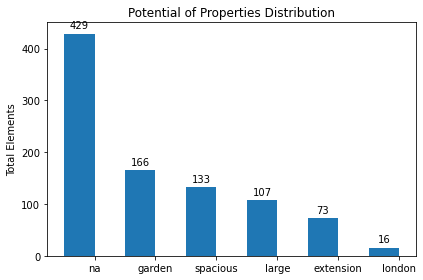

In [13]:
labels = ['na', 'garden', 'spacious', 'large', 'extension','london']
men_means = [429, 166, 133, 107, 73, 16]
# women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
# rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total Elements')
ax.set_title('Potential of Properties Distribution')
ax.set_xticks(x)
ax.set_xticklabels(labels)
# ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
#autolabel(rects2)

fig.tight_layout()

plt.show()

In [14]:
# House description length 
df['decs_len'] = df['description'].apply(lambda x: len(x))
df['decs_len']

0      254
1      253
2      250
3      254
4      249
      ... 
919    255
920    241
921    249
922    244
923     79
Name: decs_len, Length: 924, dtype: int64

In [15]:
df.describe()

,price,closest_st_miles,d_from_c,gard_feat_yn,large_feat_yn,spacious_feat_yn,extension_feat_yn,decs_len
count,924.000000,924.000000,922.000000,924.000000,924.000000,924.000000,924.000000,924.000000
mean,300396.146104,1.272078,34.361423,0.222944,0.115801,0.198052,0.016234,229.395022
std,27899.972101,0.904041,6.577000,0.416446,0.320159,0.398747,0.126442,39.176391
min,59999.000000,0.000000,6.356250,0.000000,0.000000,0.000000,0.000000,29.000000
25%,290000.000000,0.700000,30.314277,0.000000,0.000000,0.000000,0.000000,223.000000
50%,305000.000000,1.000000,33.432825,0.000000,0.000000,0.000000,0.000000,249.000000
75%,325000.000000,1.600000,40.052200,0.000000,0.000000,0.000000,0.000000,252.000000
max,325000.000000,6.300000,53.924772,1.000000,1.000000,1.000000,1.000000,255.000000


In [16]:
df.columns

Index(['title', 'address', 'description', 'price', 'phone', 'closest_station',
       'listed_on', 'image', 'closest_st_miles', 'prop_pc', 'd_from_c',
       'listed_on_2', 'location_simp', 'description_simp', 'gard_feat_yn',
       'large_feat_yn', 'spacious_feat_yn', 'extension_feat_yn', 'decs_len'],
      dtype='object')

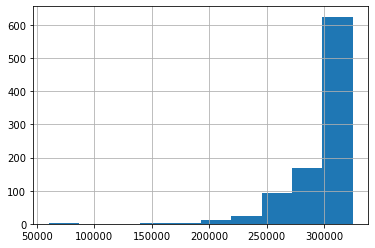

In [17]:
# distribution of house prices 
df.price.hist()

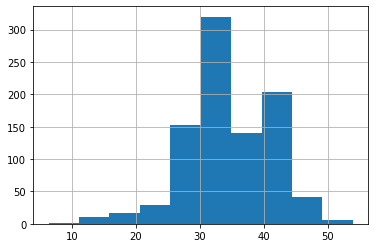

In [18]:
# distrubution of propeties distances from central London
df.d_from_c.hist()

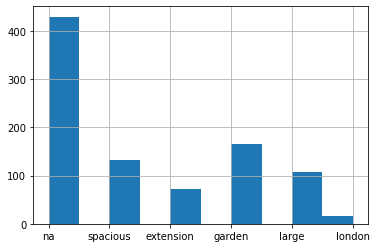

In [19]:
# distribution of ket features 
df.description_simp.hist()

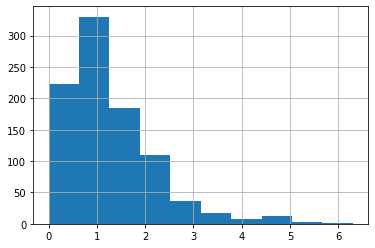

In [20]:
# distribution of properties to closest station
df.closest_st_miles.hist()

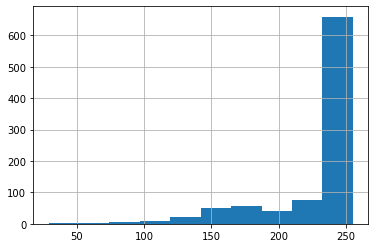

In [21]:
# properties with the most characters in description 
df.decs_len.hist()

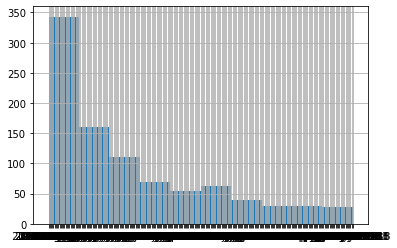

In [22]:
# distribution of length properties have been on the market 
df.listed_on_2.hist()

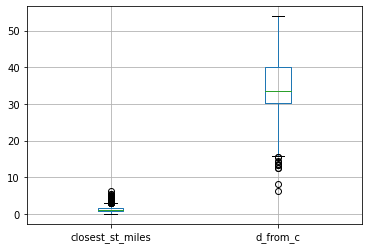

In [23]:
df.boxplot(column = ['closest_st_miles', 'd_from_c'])

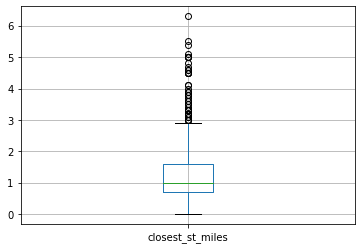

In [24]:
df.boxplot(column = 'closest_st_miles')

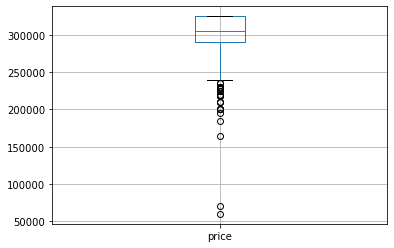

In [25]:
df.boxplot(column = 'price')

In [26]:
#correlation between the numbers
df[['price', 'closest_st_miles', 'd_from_c','decs_len']].corr()

,price,closest_st_miles,d_from_c,decs_len
price,1.000000,0.022247,-0.067126,0.082205
closest_st_miles,0.022247,1.000000,0.058385,0.018002
d_from_c,-0.067126,0.058385,1.000000,0.036727
decs_len,0.082205,0.018002,0.036727,1.000000


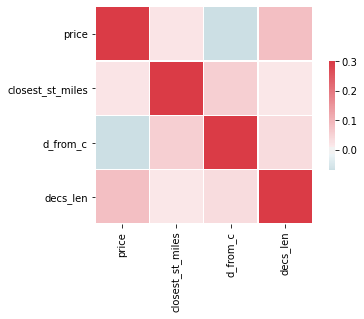

In [27]:
# heat map 
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['price', 'closest_st_miles', 'd_from_c','decs_len']].corr(), 
            vmax=.3, center=0, cmap=cmap, square=True, linewidths=.5,
            cbar_kws={"shrink":.5})

In [28]:
df.columns

Index(['title', 'address', 'description', 'price', 'phone', 'closest_station',
       'listed_on', 'image', 'closest_st_miles', 'prop_pc', 'd_from_c',
       'listed_on_2', 'location_simp', 'description_simp', 'gard_feat_yn',
       'large_feat_yn', 'spacious_feat_yn', 'extension_feat_yn', 'decs_len'],
      dtype='object')

In [29]:
# analyse the categorical variables 
# 'location_simp', 'description_simp',
df_cat = df[['title','closest_station','listed_on_2', 'prop_pc','location_simp', 'description_simp']]


Graph for title: total =15


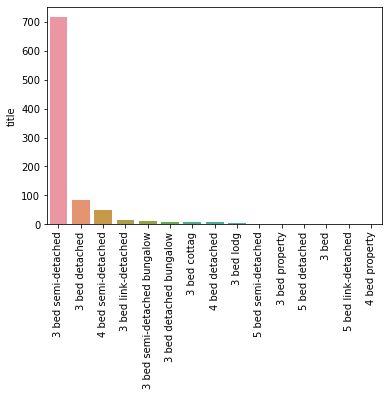

Graph for closest_station: total =149


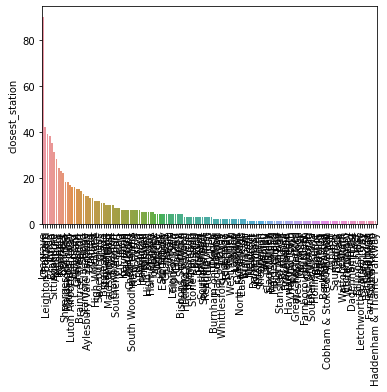

Graph for listed_on_2: total =249


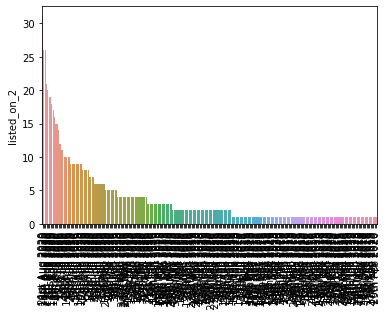

Graph for prop_pc: total =141


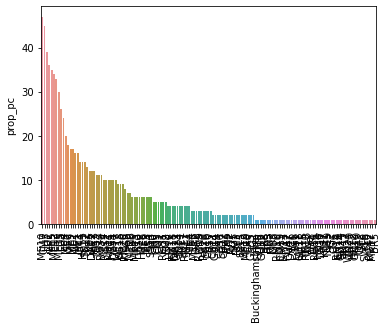

Graph for location_simp: total =9


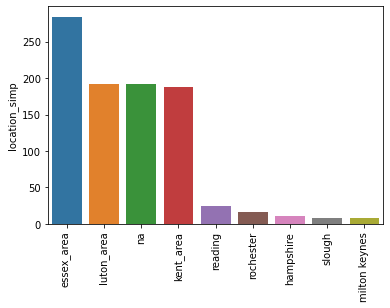

Graph for description_simp: total =6


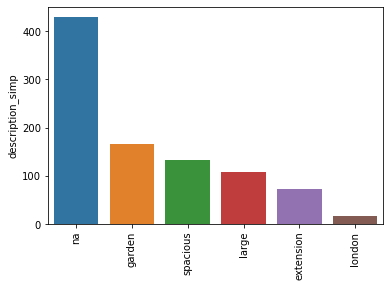

In [30]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print('Graph for %s: total =%d' % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Graph for title: total =10


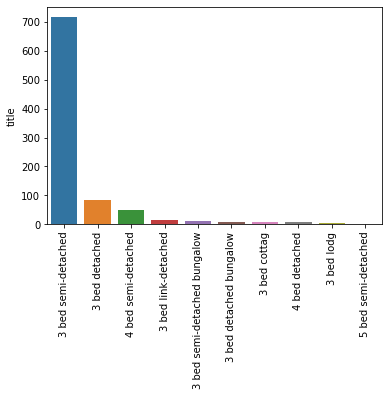

In [31]:
for i in df_cat[['title']].columns:
    cat_num = df_cat[i].value_counts()[:10]
    print('Graph for %s: total =%d' % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Graph for listed_on_2: total =30


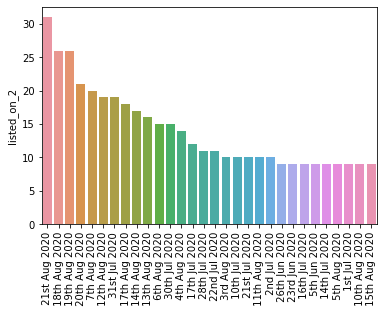

In [32]:
for i in df_cat[['listed_on_2']].columns:
    cat_num = df_cat[i].value_counts()[:30]
    print('Graph for %s: total =%d' % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Graph for closest_station: total =20


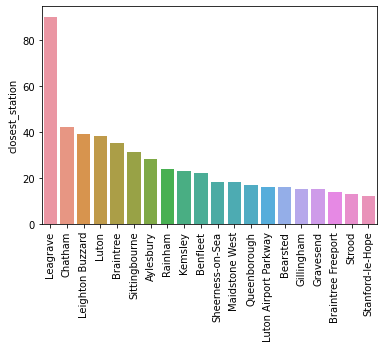

Graph for prop_pc: total =20


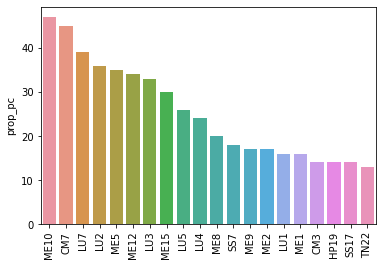

In [33]:
for i in df_cat[['closest_station','prop_pc']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print('Graph for %s: total =%d' % (i, len(cat_num)))
    fig_dims = (6, 4)
    fig, ax = plt.subplots(figsize=fig_dims)
    chart = sns.barplot(x=cat_num.index, y=cat_num, ax=ax)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [34]:
df.columns

Index(['title', 'address', 'description', 'price', 'phone', 'closest_station',
       'listed_on', 'image', 'closest_st_miles', 'prop_pc', 'd_from_c',
       'listed_on_2', 'location_simp', 'description_simp', 'gard_feat_yn',
       'large_feat_yn', 'spacious_feat_yn', 'extension_feat_yn', 'decs_len'],
      dtype='object')

In [35]:
pd.pivot_table(df, index = 'location_simp', values = 'price').sort_values('price')

,price
location_simp,
hampshire,293090.909091
kent_area,295662.148936
rochester,296750.000000
luton_area,298208.046875
essex_area,301311.161972
na,304249.427083
slough,308118.750000
milton keynes,311250.000000
reading,312416.000000


In [36]:
# sale price by description and postcode
pd.pivot_table(df, index = ['prop_pc', 'title'], values = 'price').sort_values('price')

price
prop_pc title                            
ME18    3 bed detached            59999.0
GU5     3 bed detached bungalow   70000.0
TW17    3 bed                    165000.0
DA7     3 bed semi-detached      200000.0
KT11    3 bed semi-detached      200000.0
...                                   ...
MK3     3 bed semi-detached      325000.0
ME7     5 bed semi-detached      325000.0
        3 bed detached           325000.0
RH6     3 bed semi-detached      325000.0
ME19    4 bed detached           325000.0

[249 rows x 1 columns]

In [37]:
# property price by description, location and title 
pd.pivot_table(df, index = ['description_simp','location_simp', 'title'], values = 'price')

price
description_simp location_simp title                                 
extension        essex_area    3 bed semi-detached           307000.0
                               4 bed semi-detached           325000.0
                 kent_area     3 bed semi-detached           318750.0
                               3 bed semi-detached bungalow  290000.0
                               4 bed semi-detached           320000.0
...                                                               ...
spacious         na            3 bed semi-detached           305500.0
                               5 bed semi-detached           325000.0
                 reading       3 bed semi-detached           325000.0
                 rochester     4 bed semi-detached           293000.0
                 slough        3 bed semi-detached           325000.0

[136 rows x 1 columns]

In [38]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [39]:
# property pice by postcode and job title 
pd.pivot_table(df, index = ['prop_pc', 'title'], values = 'price').sort_values('price')

,,price
prop_pc,title,
ME18,3 bed detached,59999.000000
GU5,3 bed detached bungalow,70000.000000
TW17,3 bed,165000.000000
DA7,3 bed semi-detached,200000.000000
KT11,3 bed semi-detached,200000.000000
SS5,3 bed detached bungalow,210000.000000
SS2,3 bed detached,210000.000000
HP5,3 bed detached,225000.000000
SS8,3 bed property,240000.000000


In [40]:

pd.pivot_table(df, index = 'description_simp', values = 'price').sort_values('price')

,price
description_simp,
na,298224.228438
spacious,299511.052632
garden,299596.355422
large,305120.514019
extension,307842.328767
london,308718.437500


In [41]:
pd.pivot_table(df, index = ['prop_pc', 'title'], values = 'price', aggfunc = 'count').sort_values('price')

price
prop_pc          title                              
4Aa,             3 bed semi-detached               1
ME5              3 bed detached bungalow           1
                 3 bed link-detached               1
                 4 bed semi-detached               1
ME7              3 bed detached                    1
                 5 bed semi-detached               1
ME9              3 bed detached                    1
                 3 bed property                    1
ME4              3 bed detached                    1
ME9              4 bed detached                    1
MK3              3 bed semi-detached               1
RG2              4 bed semi-detached               1
RG30             3 bed link-detached               1
RG42             3 bed semi-detached               1
RH10             3 bed semi-detached               1
RH14             3 bed detached bungalow           1
RH15             3 bed semi-detached               1
MK17             3 bed semi-detached               1
ME3              4 bed semi-detached               1
ME20             4 bed semi-detached               1
                 3 bed link-detached               1
LU5              3 bed property                    1
                 4 bed semi-detached               1
LU6              3 bed detached                    1
                 3 bed link-detached               1
                 4 bed semi-detached               1
                 5 bed detached                    1
LU7              4 bed detached                    1
ME1              4 bed semi-detached               1
ME10             3 bed link-detached               1
                 3 bed semi-detached bungalow      1
ME14             3 bed detached                    1
                 3 bed semi-detached bungalow      1
ME17             3 bed cottag                      1
ME18             3 bed detached                    1
ME19             3 bed semi-detached               1
UB5              3 bed semi-detached               1
ME20             3 bed detached                    1
RH16             3 bed semi-detached               1
RH20             4 bed semi-detached               1
RH6              3 bed detached                    1
                 3 bed semi-detached               1
SS2              3 bed detached                    1
SS4              3 bed link-detached               1
                 4 bed semi-detached               1
SS5              3 bed detached bungalow           1
SS7              3 bed semi-detached bungalow      1
                 4 bed property                    1
SS8              3 bed property                    1
                 3 bed semi-detached               1
                 4 bed detached                    1
SW16             5 bed detached                    1
TN10             3 bed semi-detached               1
TN17             3 bed semi-detached               1
TN18             5 bed semi-detached               1
TN19             3 bed semi-detached               1
TN20             3 bed semi-detached               1
TN3              3 bed semi-detached               1
TW17             3 bed                             1
SS17             4 bed semi-detached               1
LU5              3 bed link-detached               1
SS17             3 bed cottag                      1
SS12             3 bed semi-detached               1
RM10             3 bed semi-detached               1
RM13             3 bed semi-detached               1
RM17             3 bed link-detached               1
RM18             4 bed semi-detached               1
SG1              3 bed link-detached               1
                 3 bed semi-detached               1
SG15             3 bed semi-detached               1
SG18             3 bed cottag                      1
                 3 bed link-detached               1
SG2              3 bed semi-detached               1
SG6              3 bed semi-detached               1
SL0              3 

In [42]:
# number of properties in the price brackets based on location and title 
pd.pivot_table(df, index = ['location_simp', 'title'], values = 'price', aggfunc = 'count').sort_values('price')

price
location_simp title                              
essex_area    3 bed cottag                      1
kent_area     3 bed semi-detached bungalow      1
luton_area    3 bed property                    1
              4 bed detached                    1
              5 bed detached                    1
kent_area     3 bed detached bungalow           1
na            3 bed                             1
hampshire     3 bed semi-detached bungalow      1
na            3 bed detached bungalow           1
hampshire     3 bed detached bungalow           1
              3 bed detached                    1
              3 bed cottag                      1
essex_area    5 bed semi-detached               1
              5 bed link-detached               1
na            3 bed property                    1
essex_area    4 bed property                    1
na            3 bed semi-detached bungalow      1
              4 bed detached                    1
              5 bed detached                    1
essex_area    3 bed property                    1
na            5 bed semi-detached               1
reading       3 bed link-detached               1
              4 bed semi-detached               1
slough        3 bed cottag                      1
kent_area     5 bed semi-detached               1
rochester     4 bed semi-detached               2
luton_area    3 bed cottag                      2
kent_area     4 bed detached                    2
              3 bed link-detached               2
essex_area    3 bed lodg                        3
kent_area     3 bed lodg                        3
na            3 bed link-detached               3
essex_area    3 bed link-detached               4
na            3 bed cottag                      4
essex_area    4 bed detached                    4
luton_area    3 bed semi-detached bungalow      5
              3 bed link-detached               5
essex_area    3 bed semi-detached bungalow      5
              3 bed detached bungalow           7
na            4 bed semi-detached               7
slough        3 bed semi-detached               7
hampshire     3 bed semi-detached               7
milton keynes 3 bed semi-detached               8
luton_area    4 bed semi-detached               8
na            3 bed detached                   14
rochester     3 bed semi-detached              14
kent_area     4 bed semi-detached              15
luton_area    3 bed detached                   16
essex_area    4 bed semi-detached              18
kent_area     3 bed detached                   22
reading       3 bed semi-detached              23
essex_area    3 bed detached                   33
kent_area     3 bed semi-detached             141
luton_area    3 bed semi-detached             153
na            3 bed semi-detached             157
essex_area    3 bed semi-detached             205

In [43]:
# price range in essex area by property type
pd.pivot_table(df[df.location_simp == 'essex_area'], index = 'title', values = 'price').sort_values('price')

,price
title,
3 bed property,240000.000000
3 bed lodg,270000.000000
3 bed detached,299696.818182
3 bed detached bungalow,300000.000000
3 bed semi-detached,301334.048780
4 bed detached,302500.000000
4 bed semi-detached,304441.388889
3 bed semi-detached bungalow,308000.000000
3 bed cottag,310000.000000


In [44]:

pd.pivot_table(df[df.location_simp == 'luton_area'], index = 'title', values = 'price').sort_values('price')

,price
title,
3 bed property,270000.000000
3 bed cottag,285000.000000
3 bed semi-detached bungalow,285999.000000
3 bed semi-detached,295104.281046
4 bed semi-detached,313125.000000
3 bed detached,317499.687500
3 bed link-detached,320000.000000
4 bed detached,325000.000000
5 bed detached,325000.000000


In [45]:
# price range in essex area by property type and postcode
pd.pivot_table(df[df.location_simp == 'luton_area'], index = ['prop_pc', 'title'], values = 'price').sort_values('price')

price
prop_pc title                                      
ME10    3 bed semi-detached           265000.000000
LU5     3 bed property                270000.000000
LU4     3 bed semi-detached bungalow  275000.000000
LU3     3 bed semi-detached bungalow  280000.000000
LU4     3 bed semi-detached           281470.588235
LU2     3 bed cottag                  285000.000000
        3 bed semi-detached bungalow  289995.000000
LU5     3 bed semi-detached           290000.000000
ME5     3 bed semi-detached           291666.666667
LU3     3 bed semi-detached           294500.000000
LU6     3 bed semi-detached           296249.375000
LU2     3 bed semi-detached           296832.666667
LU5     4 bed semi-detached           300000.000000
LU3     3 bed link-detached           300000.000000
LU7     3 bed semi-detached           301045.000000
LU1     3 bed semi-detached           301785.357143
SS2     3 bed semi-detached           305000.000000
LU4     3 bed detached                307500.000000
        4 bed semi-detached           308333.333333
LU1     3 bed semi-detached bungalow  310000.000000
ME20    3 bed semi-detached           315000.000000
LU1     4 bed semi-detached           315000.000000
LU7     3 bed detached                316666.666667
LU5     3 bed detached                318000.000000
LU2     3 bed detached                319998.333333
LU3     3 bed detached                320000.000000
LU6     4 bed semi-detached           320000.000000
LU3     4 bed semi-detached           322500.000000
LU7     4 bed detached                325000.000000
LU5     3 bed link-detached           325000.000000
LU6     3 bed link-detached           325000.000000
        3 bed detached                325000.000000
LU7     3 bed link-detached           325000.000000
LU6     5 bed detached                325000.000000

In [46]:
# price range in luton area by property type key features
pd.pivot_table(df[df.location_simp == 'luton_area'], index = ['title','description_simp'], values = 'price').sort_values('price')

price
title                        description_simp               
3 bed property               spacious          270000.000000
3 bed cottag                 na                280000.000000
3 bed semi-detached          spacious          284388.333333
3 bed semi-detached bungalow na                285999.000000
3 bed cottag                 large             290000.000000
3 bed semi-detached          na                293493.437500
                             garden            293529.411765
4 bed semi-detached          large             295000.000000
3 bed detached               extension         295000.000000
                             london            300000.000000
4 bed semi-detached          na                300000.000000
3 bed link-detached          garden            300000.000000
3 bed semi-detached          large             301785.714286
                             london            302500.000000
                             extension         306022.272727
3 bed detached               spacious          312497.500000
4 bed semi-detached          spacious          317500.000000
                             extension         318750.000000
3 bed detached               na                323750.000000
3 bed link-detached          spacious          325000.000000
3 bed detached               large             325000.000000
3 bed link-detached          na                325000.000000
3 bed detached               garden            325000.000000
3 bed link-detached          extension         325000.000000
4 bed detached               garden            325000.000000
5 bed detached               na                325000.000000

In [47]:
# price range in essex
area by property type key features
pd.pivot_table(df[df.location_simp == 'essex_area'], index = ['title','prop_pc'], values = 'price').sort_values('price')

SyntaxError: invalid syntax (<ipython-input-47-a48f109fe68f>, line 2)

In [48]:
pd.pivot_table(df[df.location_simp == 'essex_area'], index = ['title','description_simp'], values = 'price').sort_values('price')

,,price
title,description_simp,
3 bed property,na,240000.000000
3 bed detached bungalow,na,267500.000000
3 bed lodg,na,270000.000000
3 bed semi-detached bungalow,na,285000.000000
3 bed detached,spacious,287500.000000
4 bed semi-detached,spacious,288331.666667
3 bed semi-detached,na,295097.272727
4 bed detached,spacious,298333.333333
3 bed detached,na,299317.954545


In [49]:
df.columns

Index(['title', 'address', 'description', 'price', 'phone', 'closest_station',
       'listed_on', 'image', 'closest_st_miles', 'prop_pc', 'd_from_c',
       'listed_on_2', 'location_simp', 'description_simp', 'gard_feat_yn',
       'large_feat_yn', 'spacious_feat_yn', 'extension_feat_yn', 'decs_len'],
      dtype='object')

In [50]:
# pivot tables for all descrete data
df_pivots = df[['title','closest_station', 'listed_on_2', 'prop_pc', 'location_simp', 'description_simp','gard_feat_yn',
       'large_feat_yn', 'spacious_feat_yn', 'extension_feat_yn', 'price', 'd_from_c']]

In [51]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index = i, values = 'price').sort_values('price'))

title
                                      price
title                                      
3 bed                         165000.000000
3 bed property                258333.333333
3 bed lodg                    270000.000000
3 bed detached bungalow       279500.000000
3 bed semi-detached           299965.958042
3 bed semi-detached bungalow  300307.307692
3 bed detached                303081.267442
4 bed semi-detached           304596.960784
3 bed cottag                  310555.555556
4 bed detached                312500.000000
3 bed link-detached           313196.666667
5 bed semi-detached           314833.333333
5 bed link-detached           319500.000000
4 bed property                325000.000000
5 bed detached                325000.000000
closest_station
                                   price
closest_station                         
Yalding                     59999.000000
Chilworth                   70000.000000
Shepperton                 165000.000000
Cobham & Stoke d'Abernon 

ValueError: Grouper for 'price' not 1-dimensional

In [52]:
pd.pivot_table(df_pivots, index = 'd_from_c', columns = 'large_feat_yn', values = 'price', aggfunc ='count')

large_feat_yn,0,1
d_from_c,,
6.356250,1.0,NaN
8.170118,1.0,NaN
12.494227,2.0,NaN
13.259339,1.0,NaN
13.335499,1.0,NaN
13.433931,1.0,NaN
13.717008,1.0,NaN
14.113703,1.0,NaN
14.587651,1.0,NaN


In [53]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

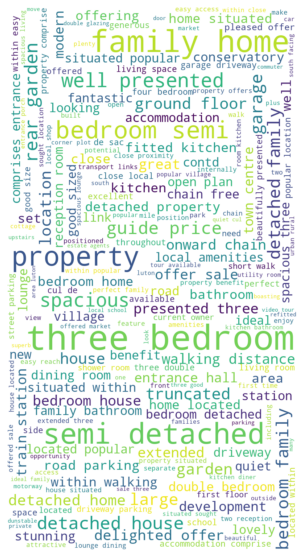

In [160]:
words = " ".join(df['description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words =set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color = "white", random_state = 1, stopwords = STOPWORDS, max_words = 200, width = 800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation = "bilinear")
plt.axis('off')
plt.show()

In [54]:
df.head()

,title,address,description,price,phone,closest_station,listed_on,image,closest_st_miles,prop_pc,d_from_c,listed_on_2,location_simp,description_simp,gard_feat_yn,large_feat_yn,spacious_feat_yn,extension_feat_yn,decs_len
0,3 bed semi-detached,"Parker Avenue, Tilbury RM18",Three bedrooms ……. Off street parking for thre...,300000,01375 318969 **,Tilbury Town,"['Listed', 'on', '22nd', 'Aug', '2020']",https://lid.zoocdn.com/354/255/62ba4526ae4d3a6...,1.0,RM18,25.057837,22nd Aug 2020,na,na,0,0,0,0,254
1,3 bed semi-detached,"Stanway Road, Benfleet SS7",**available to view from Saturday 29th August-...,250000,01621 467848 **,Benfleet,"['Listed', 'on', '22nd', 'Aug', '2020']",https://lid.zoocdn.com/354/255/889c1345fbe3b9d...,1.5,SS7,33.432825,22nd Aug 2020,essex_area,na,0,0,0,0,253
2,3 bed semi-detached,"Willowmead, Leybourne, West Malling ME19","Guide Price £300,000 - £325,000. Jack Charles ...",300000,01732 658092 **,West Malling,"['Listed', 'on', '21st', 'Aug', '2020']",https://lid.zoocdn.com/354/255/f78903931391257...,1.0,ME19,29.566699,21st Aug 2020,na,spacious,0,0,1,0,250
3,3 bed semi-detached,"Baker Road, Langley Park, Maidstone ME17",A contemporary 3 bedroom semi detached family ...,325000,01622 279528 **,Bearsted,"['Listed', 'on', '21st', 'Aug', '2020']",https://lid.zoocdn.com/354/255/137a316864699b5...,2.7,ME17,40.718816,21st Aug 2020,na,na,0,0,0,0,254
4,3 bed semi-detached,"Bisley, Woking, Surrey GU24",Set in a quiet cul de sac and offered to marke...,325000,01483 550642 **,Brookwood,"['Listed', 'on', '21st', 'Aug', '2020']",https://lid.zoocdn.com/354/255/b0dba3a15f021d0...,1.4,GU24,24.453962,21st Aug 2020,slough,spacious,0,0,1,0,249


In [60]:
#from IPython.display import FileLink, FileLinks

df.to_csv('C:/Users/TimK/Documents/ds_zoop_proj/zeda_data.csv')
# df.to_excel('C:/Users/TimK/Documents/ds_zoop_proj/zeda_data.xlsx', index=False)

# FileLinks('C:/Users/TimK/Documents/ds_zoop_proj/zeda_data.csv')